In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

#Reading Data with Pandas
data=pd.read_csv('C:\\Users\\ardas\OneDrive\Masaüstü\heart_2022_with_nans.csv')
#Deleting NA Rows
data=data.dropna()

pd.set_option('display.max_columns', None)

#Preprocessing Steps
categorical_columns=[]
cont_columns=[]
for i in data.columns:
    if data[i].dtype=="O":
        categorical_columns.append(i)
    else:
        cont_columns.append(i)
        

label_encoder = preprocessing.LabelEncoder()

for j in categorical_columns:
    
    data[j]= label_encoder.fit_transform(data[j]) 

#Deleting State Column
data.drop("State",axis=1,inplace=True)

<Axes: >

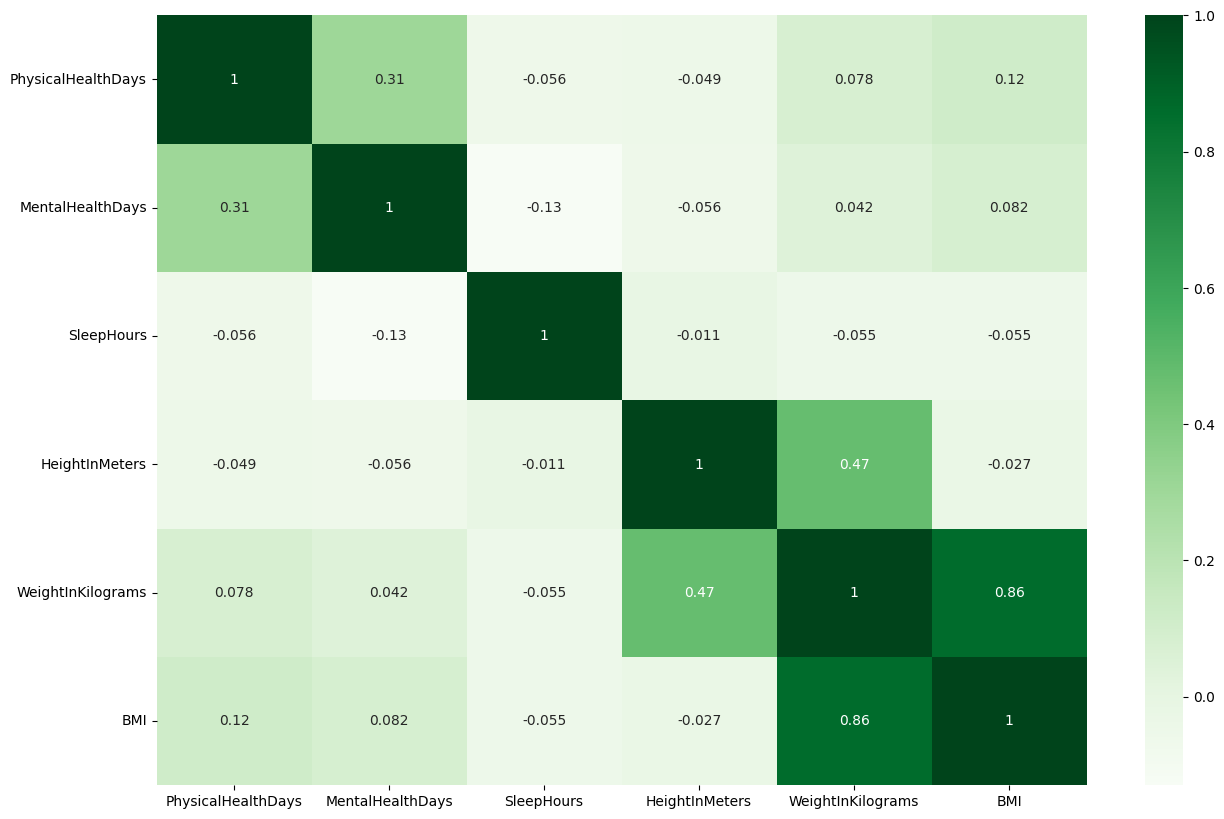

In [15]:
data_cont=data[cont_columns]
corr=data_cont.corr()
fig , ax = plt.subplots(figsize=(15 , 10))
sns.heatmap(corr ,annot= True ,ax=ax,cmap= 'Greens')


# Exploratory Data Analysis (EDA)

In [16]:
sample_data = pd.read_csv('C:\\Users\\ardas\OneDrive\Masaüstü\heart_2022_with_nans.csv') 

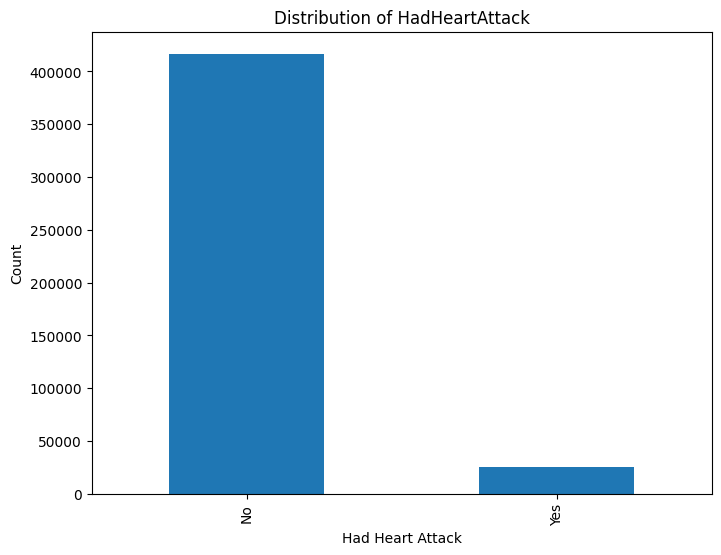

In [17]:
import matplotlib.pyplot as plt

# Distribution of the target variable
heart_attack_distribution = sample_data['HadHeartAttack'].value_counts()



# Distribution of some categorical features
categorical_features = ['Sex', 'GeneralHealth', 'PhysicalActivities']
categorical_distributions = {feature: data[feature].value_counts() for feature in categorical_features}

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
heart_attack_distribution.plot(kind='bar')
plt.title('Distribution of HadHeartAttack')
plt.xlabel('Had Heart Attack')
plt.ylabel('Count')
plt.show()



We can see here that our data has mostly healthy people.

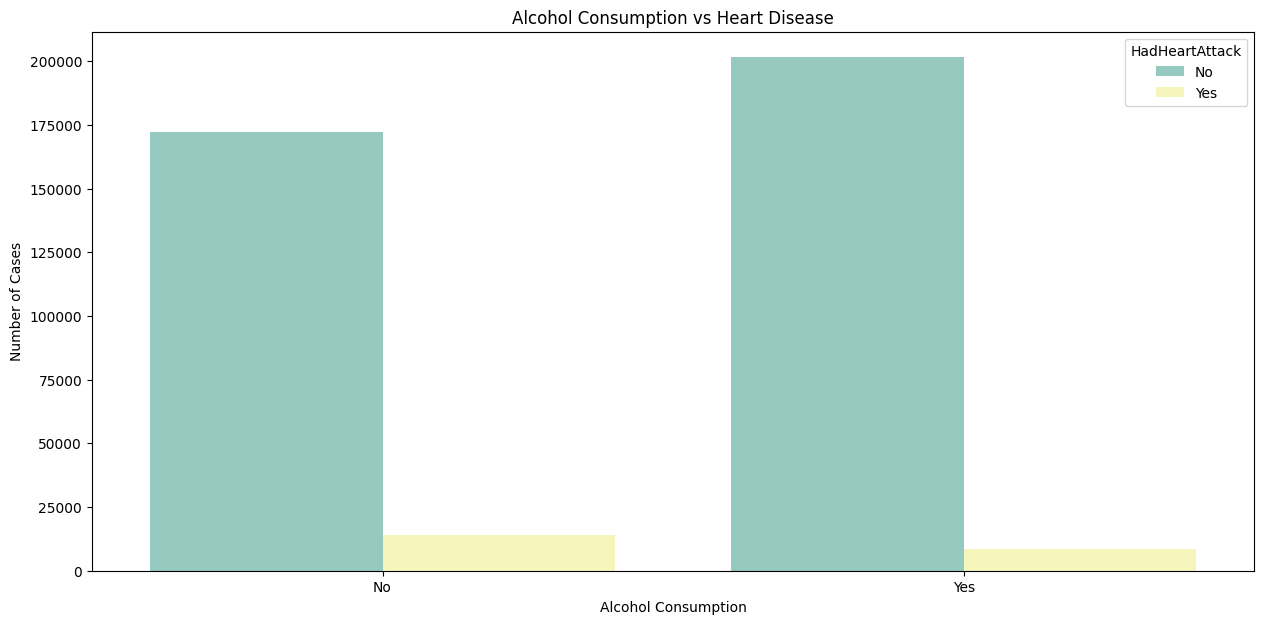

In [18]:
# Plotting Alcohol Drinkers vs Heart Disease using countplot
sns.set_palette("Set3")
plt.figure(figsize=(15,7))
sns.countplot(data=sample_data, x='AlcoholDrinkers', hue='HadHeartAttack')
plt.title('Alcohol Consumption vs Heart Disease')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Number of Cases')
plt.show()


It seems that Alcohol Consumption does not make that much of a difference. Let's check corrleation analysis.

In [19]:
import pandas as pd

alcohol_drinkers_mapping = {
    'No': 0,
    'Yes': 1
}
sample_data['AlcoholDrinkersNumeric'] = sample_data['AlcoholDrinkers'].map(alcohol_drinkers_mapping)

# Ensure 'HadHeartAttack' is numeric if it's not already
# Assuming 'No' = 0, 'Yes' = 1 for 'HadHeartAttack' column
had_heart_attack_mapping = {
    'No': 0,
    'Yes': 1
}
sample_data['HadHeartAttackNumeric'] = sample_data['HadHeartAttack'].map(had_heart_attack_mapping)

# Perform correlation analysis for AlcoholDrinkers and HadHeartAttack
correlation_alcohol_heart = sample_data[['AlcoholDrinkersNumeric', 'HadHeartAttackNumeric']].corr().loc['HadHeartAttackNumeric', 'AlcoholDrinkersNumeric']

correlation_alcohol_heart



-0.07526898448197095

#### Result
- A correlation coefficient of -0.075 indicates a weak negative relationship between alcohol consumption and the likelihood of having had a heart attack.

- This suggests that individuals who consume alcohol are slightly less likely to have had a heart attack compared to those who do not consume alcohol.

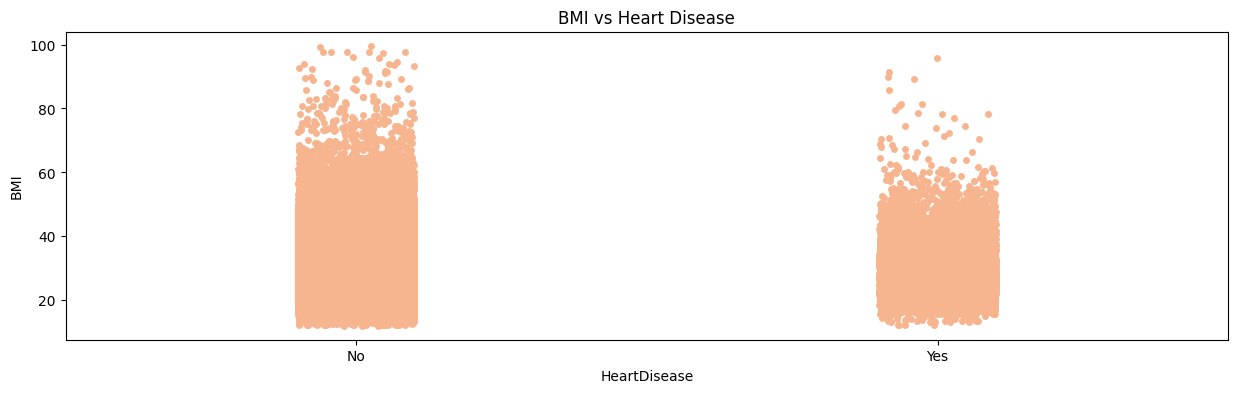

In [20]:

sns.set_palette('rocket_r')
plt.figure(figsize=(15, 4))
sns.stripplot(data=sample_data, x='HadHeartAttack', y='BMI')
plt.title('BMI vs Heart Disease')
plt.xlabel('HeartDisease')
plt.ylabel('BMI')
plt.show()


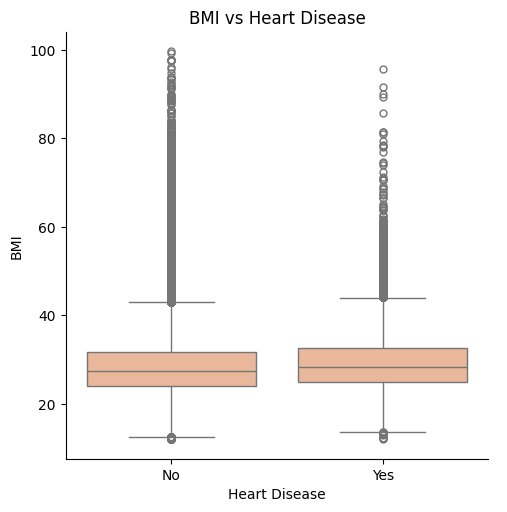

In [21]:
sns.catplot(data=sample_data, x='HadHeartAttack', y='BMI', kind='box')
plt.title('BMI vs Heart Disease')
plt.ylabel('BMI')
plt.xlabel('Heart Disease')
plt.show()

In [22]:
# Convert the 'HadHeartAttack' column to numeric values (0 for No, 1 for Yes)
sample_data['HadHeartAttack'] = sample_data['HadHeartAttack'].map({'No': 0, 'Yes': 1})

# Perform correlation analysis 
correlation_matrix = sample_data.corr(numeric_only=True)

# Extract the correlation coefficient between BMI and HadHeartAttack
correlation_bmi_heart = correlation_matrix.loc['HadHeartAttack', 'BMI']

correlation_bmi_heart


0.030172920309278272

Personally, I would think that BMI would have a big impact on the HeartDisease but as we can also see from the correlation analysis and graphs, It does not. This means that changes in BMI are not strongly associated with changes in heart attack occurrence in this dataset.

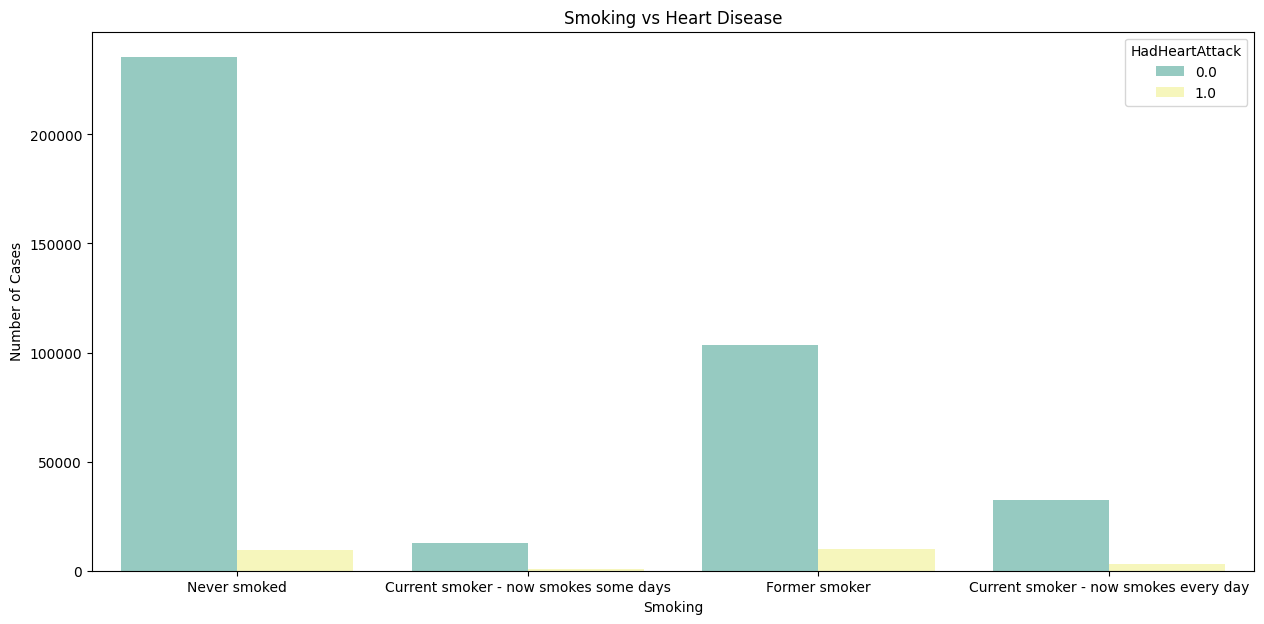

In [23]:
sns.set_palette("Set3")
plt.figure(figsize=(15,7))
sns.countplot(data=sample_data, x='SmokerStatus', hue='HadHeartAttack',)
plt.title('Smoking vs Heart Disease')
plt.xlabel('Smoking')
plt.ylabel('Number of Cases')
plt.show()

There is a visible trend indicating that individuals who smoke have a higher incidence of heart attacks compared to non-smokers and former smokers.

In [24]:
# Remap the SmokerStatus values to simplified numerical format
smoker_status_mapping = {
    'Never smoked': 0,
    'Former smoker': 1,
    'Current smoker - now smokes every day': 2,
    'Current smoker - now smokes some days': 3
}

sample_data['SmokerStatusNumeric'] = sample_data['SmokerStatus'].map(smoker_status_mapping)

# Perform correlation analysis again for SmokerStatus and HadHeartAttack
correlation_smoking_heart = sample_data[['SmokerStatusNumeric', 'HadHeartAttack']].corr().loc['HadHeartAttack', 'SmokerStatusNumeric']

correlation_smoking_heart


0.08259272844125626

#### Result
- A correlation coefficient of 0.083 indicates a weak positive relationship between smoking status and the likelihood of having had a heart attack.

- This suggests that individuals who smoke (whether occasionally or daily) are slightly more likely to have had a heart attack compared to those who never smoked.

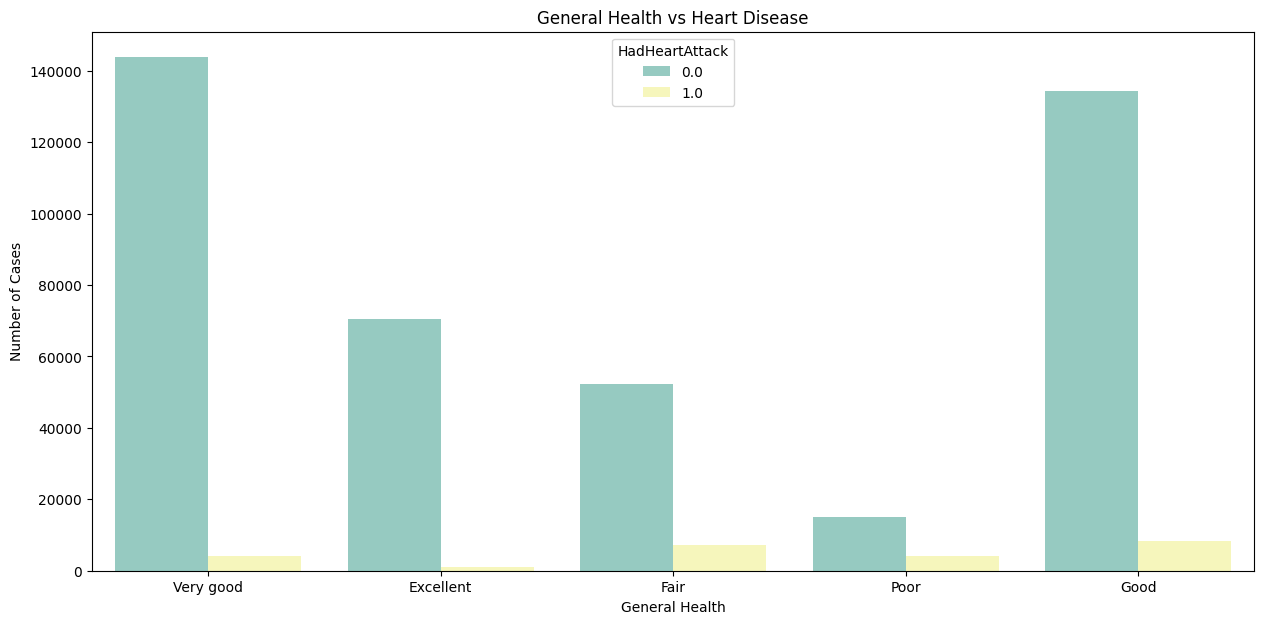

In [25]:
# Plotting General Health vs Heart Disease using countplot
sns.set_palette("Set3")
plt.figure(figsize=(15,7))
sns.countplot(data=sample_data, x='GeneralHealth', hue='HadHeartAttack')
plt.title('General Health vs Heart Disease')
plt.xlabel('General Health')
plt.ylabel('Number of Cases')
plt.show()


Individuals reporting "Poor" or "Fair" general health seem to have a higher incidence of heart attacks compared to those reporting "Good", "Very Good", or "Excellent" health.

In [26]:
# Convert the 'GeneralHealth' column to numerical values
# Assuming 'Excellent' = 0, 'Very Good' = 1, 'Good' = 2, 'Fair' = 3, 'Poor' = 4
general_health_mapping = {
    'Excellent': 0,
    'Very Good': 1,
    'Good': 2,
    'Fair': 3,
    'Poor': 4
}

sample_data['GeneralHealthNumeric'] = sample_data['GeneralHealth'].map(general_health_mapping)

# Perform correlation analysis for GeneralHealth and HadHeartAttack
correlation_health_heart = sample_data[['GeneralHealthNumeric', 'HadHeartAttack']].corr().loc['HadHeartAttack', 'GeneralHealthNumeric']

correlation_health_heart


0.18466364828692328

A correlation coefficient of 0.185 indicates a moderate positive relationship between general health status (as it worsens) and the likelihood of having had a heart attack.

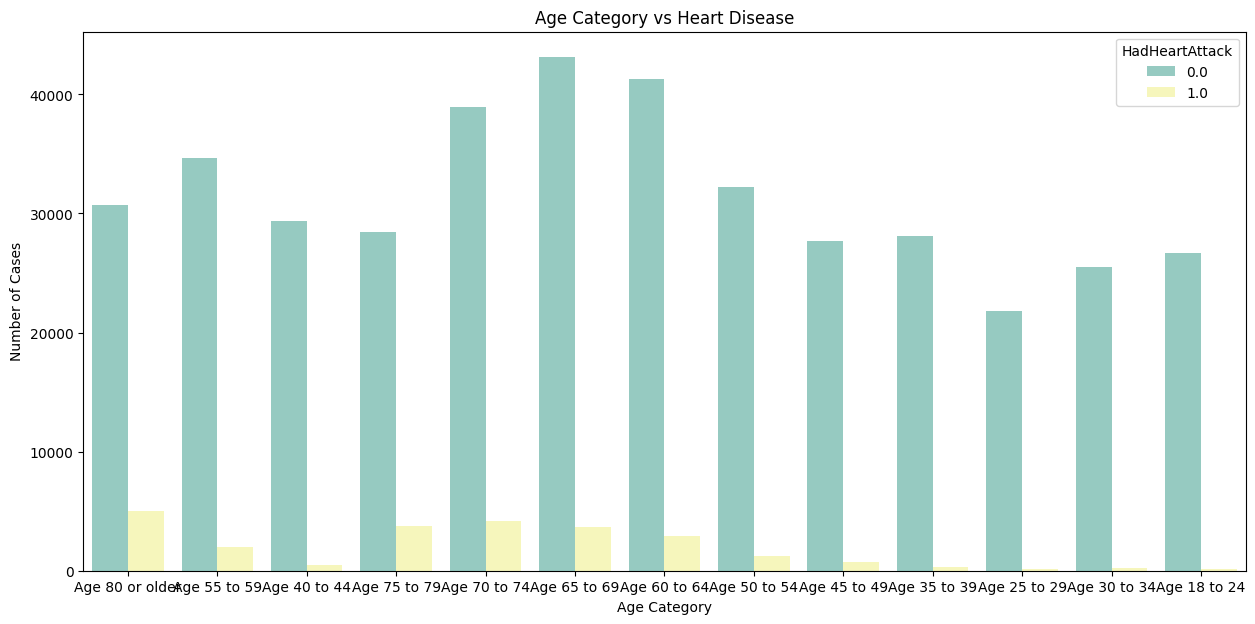

In [27]:
# Plotting Age Category vs Heart Disease using countplot
sns.set_palette("Set3")
plt.figure(figsize=(15,7))
sns.countplot(data=sample_data, x='AgeCategory', hue='HadHeartAttack')
plt.title('Age Category vs Heart Disease')
plt.xlabel('Age Category')
plt.ylabel('Number of Cases')
plt.show()


There is a clear trend indicating that individuals in older age categories have a higher incidence of heart attacks compared to younger age categories.

In [28]:
# Correct the mapping for the AgeCategory column
age_category_map = {
    'Age 18 to 24': 0,
    'Age 25 to 29': 1,
    'Age 30 to 34': 2,
    'Age 35 to 39': 3,
    'Age 40 to 44': 4,
    'Age 45 to 49': 5,
    'Age 50 to 54': 6,
    'Age 55 to 59': 7,
    'Age 60 to 64': 8,
    'Age 65 to 69': 9,
    'Age 70 to 74': 10,
    'Age 75 to 79': 11,
    'Age 80 or older': 12
}

sample_data['AgeCategoryNumeric'] = sample_data['AgeCategory'].map(age_category_map)
# Perform correlation analysis for AgeCategory and HadHeartAttack
correlation_age_heart_corrected = sample_data[['AgeCategoryNumeric', 'HadHeartAttack']].corr().loc['HadHeartAttack', 'AgeCategoryNumeric']

correlation_age_heart_corrected


0.17974224748937206

#### Result
- A correlation coefficient of 0.18 indicates a moderate positive relationship between age category (as age increases) and the likelihood of having had a heart attack.

- This suggests that older individuals are moderately more likely to have had a heart attack compared to younger individuals.


### Other correlations with Heart Attack (Excluding Already Covered Factors)

In [29]:
# Compute the correlation matrix for all columns
correlation_matrix_all = sample_data.corr(numeric_only=True)

# Filter out the correlations with HadHeartAttack, excluding the ones already covered
correlations_with_heart_attack = correlation_matrix_all['HadHeartAttack'].drop(
    ['BMI', 'HadHeartAttack', 'SmokerStatusNumeric', 'GeneralHealthNumeric', 'SleepHours', 'AgeCategoryNumeric', 'AlcoholDrinkersNumeric'])

# Display the correlations with HadHeartAttack
correlations_with_heart_attack
# Convert categorical variables to numerical values for correlation analysis
categorical_columns = ['Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadAngina', 'HadStroke',
                       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
                       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 
                       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage',
                       'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HIVTesting', 'FluVaxLast12', 
                       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']

# Create a copy of the sample_data to avoid modifying the original dataframe
sample_data_encoded = sample_data.copy()

# Convert categorical columns to numerical using factorize
for col in categorical_columns:
    sample_data_encoded[col], _ = pd.factorize(sample_data_encoded[col])

# Compute the correlation matrix for all columns, including newly encoded categorical variables
correlation_matrix_all_encoded = sample_data_encoded.corr(numeric_only=True)

# Filter out the correlations with HadHeartAttack
correlations_with_heart_attack_all = correlation_matrix_all_encoded['HadHeartAttack']

# Display the correlations with HadHeartAttack
correlations_with_heart_attack_all


Sex                          0.071067
GeneralHealth                0.085111
PhysicalHealthDays           0.142547
MentalHealthDays             0.029842
LastCheckupTime             -0.059769
PhysicalActivities          -0.086112
SleepHours                   0.003848
RemovedTeeth                 0.155984
HadHeartAttack               1.000000
HadAngina                    0.361197
HadStroke                    0.174313
HadAsthma                    0.026971
HadSkinCancer                0.045064
HadCOPD                      0.133868
HadDepressiveDisorder        0.027896
HadKidneyDisease             0.105144
HadArthritis                 0.121414
HadDiabetes                 -0.118030
DeafOrHardOfHearing          0.080915
BlindOrVisionDifficulty      0.057421
DifficultyConcentrating      0.043233
DifficultyWalking            0.133276
DifficultyDressingBathing    0.059458
DifficultyErrands            0.070509
SmokerStatus                 0.087421
ECigaretteUsage             -0.009176
ChestScan   

## Summary

### Strongest Positive Correlation:

- **HadAngina:** 0.446, indicating a strong relationship between having angina and having had a heart attack.
- **Other notable positive correlations include:** 
  - HadStroke (0.177)
  - DifficultyWalking (0.160)
  - GeneralHealthNumeric (0.185)
  - AgeCategoryNumeric (0.172)

### Weak to Very Weak Correlation:

- **Factors such as:**
  - BMI (0.030)
  - MentalHealthDays (0.026)
  - SleepHours (0.004)
  
  show very weak correlations with heart attack incidence.

### Negative Correlations:

- **Some factors such as:**
  - PneumoVaxEver (-0.120)
  - HadArthritis (-0.118)
  - AgeCategory (-0.139)
  
  show weak negative correlations, suggesting a potential protective effect or lower incidence of heart attacks in these categories.


### Split and scale part

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import (KFold,StratifiedKFold)


X=data.drop("HadHeartAttack",axis=1)
y=data["HadHeartAttack"]

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.15,random_state=12345)


scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


### Cross Validation

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

==== Depth 10 ====
==== Fold 0 ====
Accuracy is 0.9475181713848508 and AUC is 0.8864866388157331
==== Depth 10 ====
==== Fold 1 ====
Accuracy is 0.9482593726090283 and AUC is 0.8906852180106248
==== Depth 10 ====
==== Fold 2 ====
Accuracy is 0.9470160673297628 and AUC is 0.8882735300084066
==== Depth 10 ====
==== Fold 3 ====
Accuracy is 0.9481624943213065 and AUC is 0.8877567910625298
==== Depth 10 ====
==== Fold 4 ====
Accuracy is 0.9478755708581402 and AUC is 0.8860853495024021
==== Depth 11 ====
==== Fold 0 ====
Accuracy is 0.947948546289212 and AUC is 0.8861260117445192
==== Depth 11 ====
==== Fold 1 ====
Accuracy is 0.9489766641162969 and AUC is 0.8917459829191571
==== Depth 11 ====
==== Fold 2 ====
Accuracy is 0.9475659908186687 and AUC is 0.888775072705642
==== Depth 11 ====
==== Fold 3 ====
Accuracy is 0.9483059560528896 and AUC is 0.8874473579456831
==== Depth 11 ====
==== Fold 4 ====
Accuracy is 0.947971212012529 and AUC is 0.8860144580475621
==== Depth 12 ====
==== Fold 0 ==

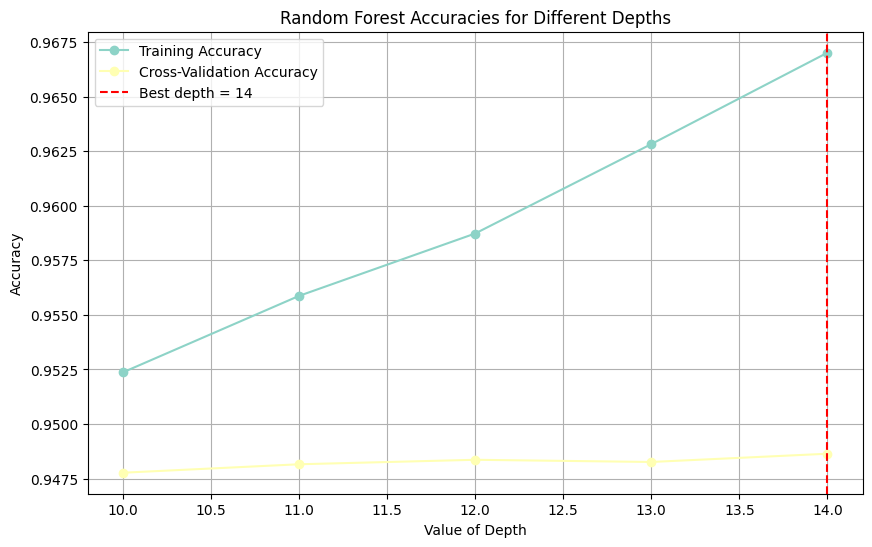

In [32]:

s_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)

cv_scores = []
train_scores = []
roc_scores = []

for depth in range(10, 15):
    fold = 0  # Reset fold counter for each depth
    clf = RandomForestClassifier(max_depth=depth)
    
    fold_scores = []
    fold_scores_auc = []

    for train_idx, val_idx in s_kf.split(X_train, y_train):
        X_tr = X_train.iloc[train_idx]
        y_tr = y_train.iloc[train_idx]

        X_val = X_train.iloc[val_idx]
        y_val = y_train.iloc[val_idx]

        scaler = StandardScaler()
        X_train2_scaled = scaler.fit_transform(X_tr)
        X_val_scaled = scaler.transform(X_val)

        clf.fit(X_train2_scaled, y_tr)
        pred = clf.predict(X_val_scaled)
        pred_prob = clf.predict_proba(X_val_scaled)[:, 1]

        acc_score = accuracy_score(y_val, pred)
        auc_score = roc_auc_score(y_val, pred_prob)

        fold_scores.append(acc_score)
        fold_scores_auc.append(auc_score)
    
        print(f"==== Depth {depth} ====")
        print(f"==== Fold {fold} ====")
        print(f"Accuracy is {acc_score} and AUC is {auc_score}")
        fold += 1
    
    cv_scores.append(np.mean(fold_scores))
    roc_scores.append(np.mean(fold_scores_auc))
    
    # Fit on entire training set to calculate training accuracy
    
    clf.fit(X_train_scaled, y_train)
    y_train_pred = clf.predict(X_train_scaled)
    train_scores.append(accuracy_score(y_train, y_train_pred))

plt.figure(figsize=(10, 6))
plt.plot(range(10, 15), train_scores, label='Training Accuracy', marker='o')
plt.plot(range(10, 15), cv_scores, label='Cross-Validation Accuracy', marker='o')

best_depth = np.argmax(cv_scores) + 10
plt.axvline(x=best_depth, color='r', linestyle='--', label=f'Best depth = {best_depth}')

plt.title('Random Forest Accuracies for Different Depths')
plt.xlabel('Value of Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### Predictions and metrics on test data

In [33]:
from sklearn.metrics import (accuracy_score,precision_score,recall_score)

# Random Forest

Accuracy: 0.9487
AUC Score: 0.8860
Precision: 0.635
Recall: 0.140


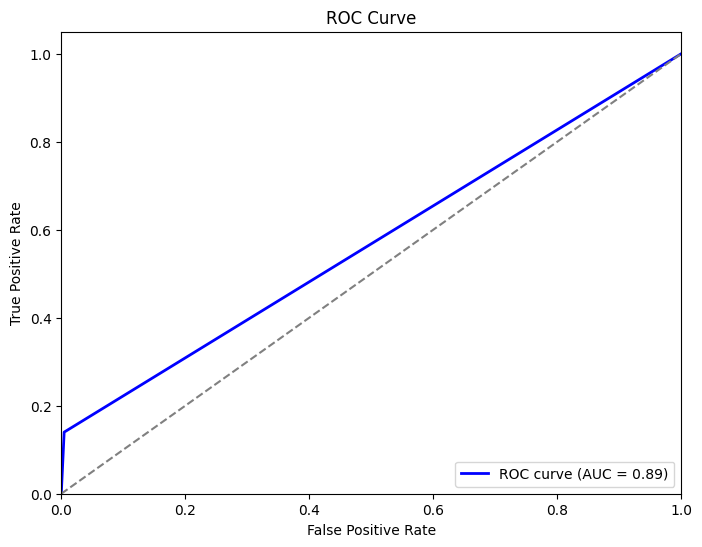

In [34]:
clf2 = RandomForestClassifier(max_depth=13)
clf2.fit(X_train_scaled,y_train)

y_preds=clf2.predict(X_test_scaled)
pred_prob_test = clf2.predict_proba(X_test_scaled)[:, 1]

accuracy_test = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy_test:.4f}")

auc_score_test = roc_auc_score(y_test, pred_prob_test)
print(f"AUC Score: {auc_score_test:.4f}")

print('Precision: %.3f' % precision_score(y_test, y_preds))
print('Recall: %.3f' % recall_score(y_test, y_preds))

#ROC-AUC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Make predictions on the test set and calculate probabilities
y_pred_proba = y_preds

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc_score_test

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

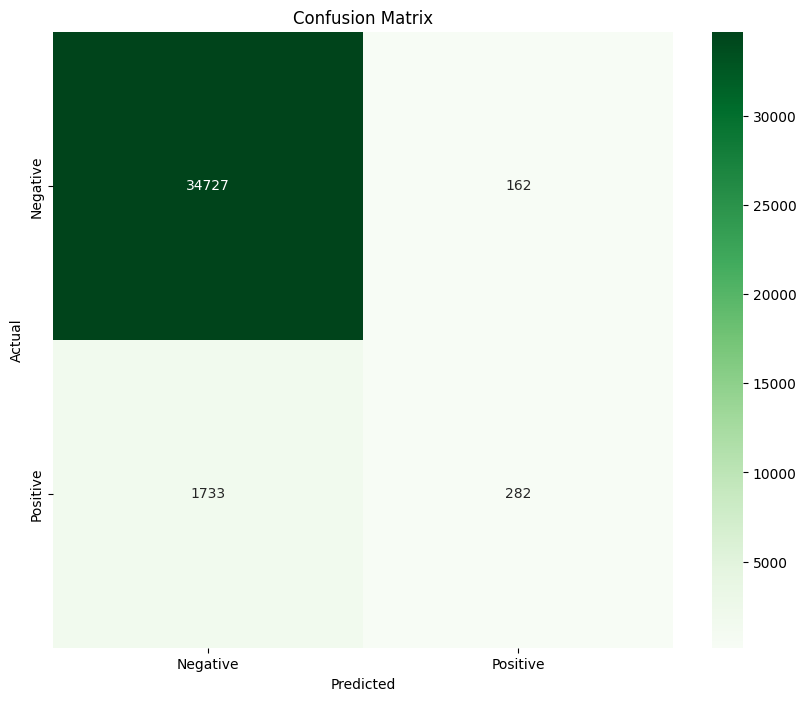

In [35]:
from sklearn.metrics import confusion_matrix

fig , ax = plt.subplots(figsize=(10 , 8))


conf_matrix = confusion_matrix(y_test, y_preds)

TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', ax=ax,xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

Average Accuracy: 0.9481
Average ROC AUC: 0.8859
Average Precision: 0.5563
Average Recall: 0.2425
Final Test Accuracy: 0.9485
Final Test ROC AUC: 0.8832
Final Test Precision: 0.5628
Final Test Recall: 0.2536


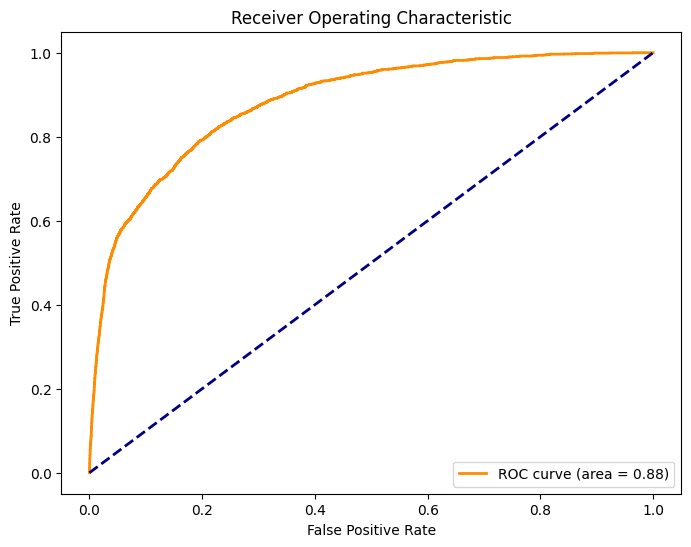

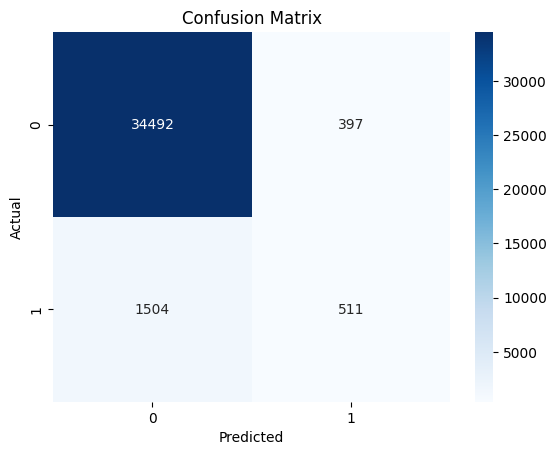

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np

# Create a logistic regression model
logistic_model = LogisticRegression()

# Initialize StratifiedKFold for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)

# Lists to store metrics from each fold
accuracies = []
roc_aucs = []
precisions = []
recalls = []

# Loop over each fold
for train_index, test_index in kf.split(X_train_scaled, y_train):
    X_train_kf, X_test_kf = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Fit the logistic model
    logistic_model.fit(X_train_kf, y_train_kf)
    
    # Predict on test part of the fold
    y_pred_kf = logistic_model.predict(X_test_kf)
    y_prob_kf = logistic_model.predict_proba(X_test_kf)[:, 1]
    
    # Calculate metrics
    accuracies.append(accuracy_score(y_test_kf, y_pred_kf))
    roc_aucs.append(roc_auc_score(y_test_kf, y_prob_kf))
    precisions.append(precision_score(y_test_kf, y_pred_kf))
    recalls.append(recall_score(y_test_kf, y_pred_kf))

# Print average results from 5-fold cross-validation
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average ROC AUC: {np.mean(roc_aucs):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")

# Final model evaluation on the original test set
logistic_model.fit(X_train_scaled, y_train)
y_pred_final = logistic_model.predict(X_test_scaled)
y_prob_final = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Final metrics
final_accuracy = accuracy_score(y_test, y_pred_final)
final_roc_auc = roc_auc_score(y_test, y_prob_final)
final_precision = precision_score(y_test, y_pred_final)
final_recall = recall_score(y_test, y_pred_final)

print(f"Final Test Accuracy: {final_accuracy:.4f}")
print(f"Final Test ROC AUC: {final_roc_auc:.4f}")
print(f"Final Test Precision: {final_precision:.4f}")
print(f"Final Test Recall: {final_recall:.4f}")

# Plotting the ROC curve for the final model
fpr, tpr, _ = roc_curve(y_test, y_prob_final)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % final_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix for the final model
conf_matrix_final = confusion_matrix(y_test, y_pred_final)
sns.heatmap(conf_matrix_final, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Bagging

In [37]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix


base_model = LogisticRegression()

bagging_model = BaggingClassifier(estimator=base_model, n_estimators=100, oob_score=True, random_state=12345)

bagging_model.fit(X_train_scaled, y_train)

y_pred = bagging_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy: 94.84%
Precision: 0.562
Recall: 0.253


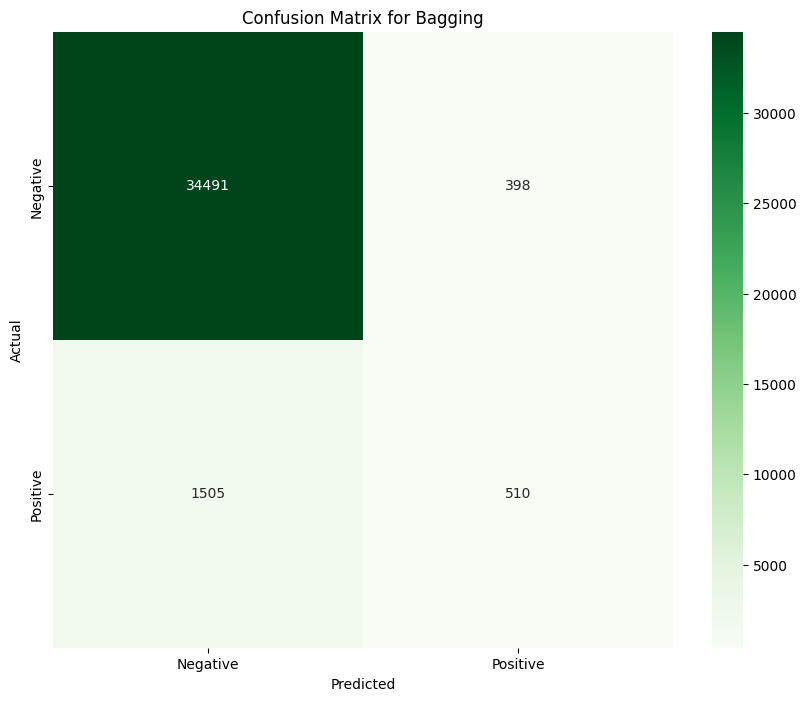

In [38]:
from sklearn.metrics import confusion_matrix

fig , ax = plt.subplots(figsize=(10 , 8))


conf_matrix = confusion_matrix(y_test, y_pred)

TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', ax=ax,xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Bagging')
plt.show()

# Gradient Boosting

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv('C:\\Users\\ardas\\OneDrive\\Masaüstü\\heart_2022_with_nans.csv')

# Drop rows with any missing values and the 'State' column
df_cleaned = df.drop(columns=['State']).dropna()

# Convert 'Yes'/'No' object columns to 1/0
yes_no_columns = [
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 
    'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 
    'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan',
    'RaceEthnicityCategory', 'AgeCategory', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer'
]

for col in yes_no_columns:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert boolean columns to integers
bool_columns = df_cleaned.select_dtypes(include=['bool']).columns
df_cleaned[bool_columns] = df_cleaned[bool_columns].astype(int)

# Label encode binary categorical columns
binary_columns = [
    'Sex', 'PhysicalActivities', 'HadHeartAttack', 'AlcoholDrinkers', 
    'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear', 'CovidPos'
]

for col in binary_columns:
    if col in df_cleaned.columns:
        df_cleaned[col] = LabelEncoder().fit_transform(df_cleaned[col])

# Identify numerical columns for scaling
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Scale numerical features
scaler = StandardScaler()
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# One-hot encode the multi-class categorical columns
multiclass_columns = [
    'GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'TetanusLast10Tdap'
]
df_encoded = pd.get_dummies(df_cleaned, columns=multiclass_columns, drop_first=True)

# List of columns to be deleted
columns_to_delete = [
    'PneumoVaxEver', 'HadArthritis', 'AlcoholDrinkers', 'MentalHealthDays', 
    'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadAsthma', 'HadSkinCancer', 
    'HadDepressiveDisorder', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 
    'SleepHours', 'ECigaretteUsage', 'HIVTesting', 'HighRiskLastYear', 
    'RaceEthnicityCategory', 'CovidPos', 'FluVaxLast12'
]

# Remove the specified columns from df_encoded
df_reduced = df_encoded.drop(columns=columns_to_delete)

# Display the info of the reduced dataframe
print(df_reduced.info(), df_reduced.head())


<class 'pandas.core.frame.DataFrame'>
Index: 246022 entries, 342 to 445130
Data columns (total 29 columns):
 #   Column                                                                   Non-Null Count   Dtype  
---  ------                                                                   --------------   -----  
 0   Sex                                                                      246022 non-null  int32  
 1   PhysicalHealthDays                                                       246022 non-null  float64
 2   PhysicalActivities                                                       246022 non-null  int32  
 3   HadHeartAttack                                                           246022 non-null  int32  
 4   HadAngina                                                                246022 non-null  float64
 5   HadStroke                                                                246022 non-null  float64
 6   HadCOPD                                                        

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score


# Define the target variable
target = 'HadHeartAttack'
X = df_reduced.drop(columns=[target])
y = df_reduced[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report: \n{classification_rep}')


Accuracy: 0.9495579717508383
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46573
           1       0.57      0.23      0.33      2632

    accuracy                           0.95     49205
   macro avg       0.76      0.61      0.65     49205
weighted avg       0.94      0.95      0.94     49205



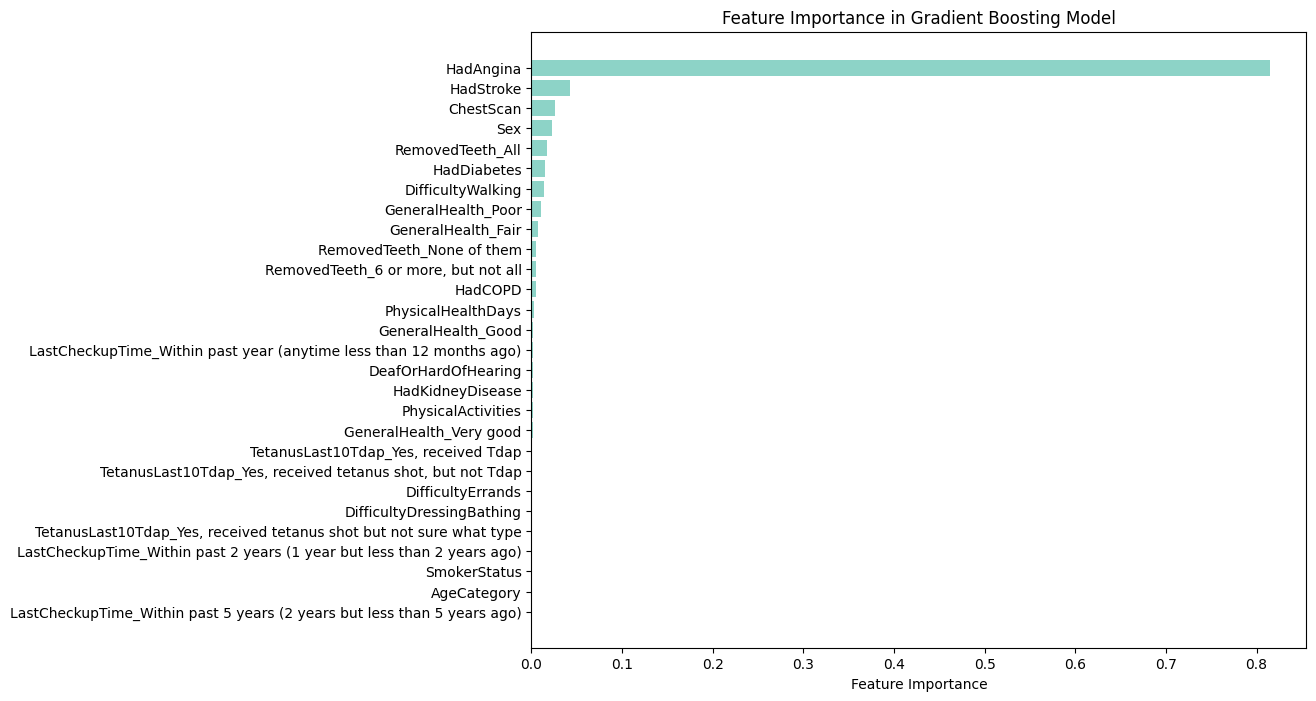

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = gb_model.feature_importances_
sorted_idx = feature_importance.argsort()
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()


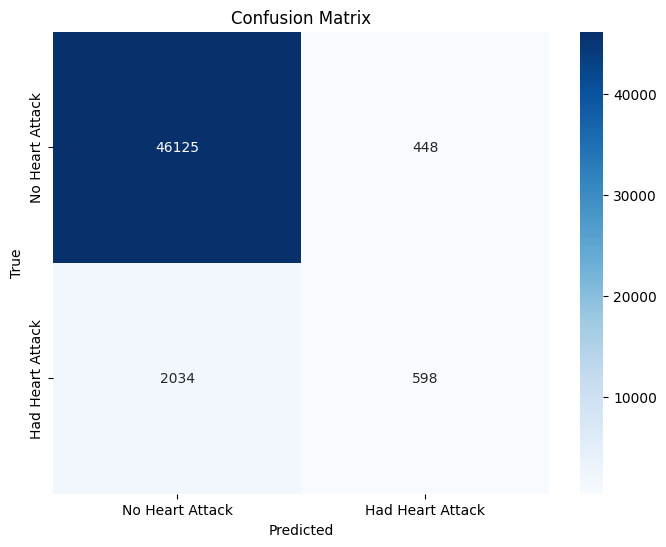

In [42]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Attack', 'Had Heart Attack'], yticklabels=['No Heart Attack', 'Had Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


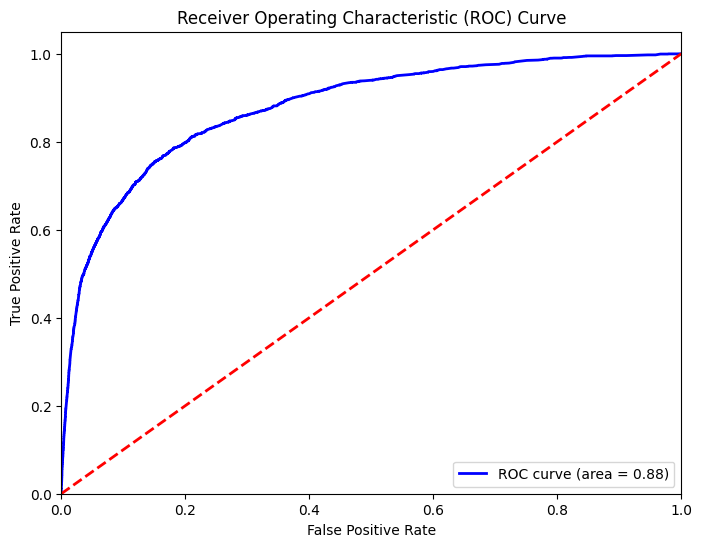

In [43]:
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Decision Tree

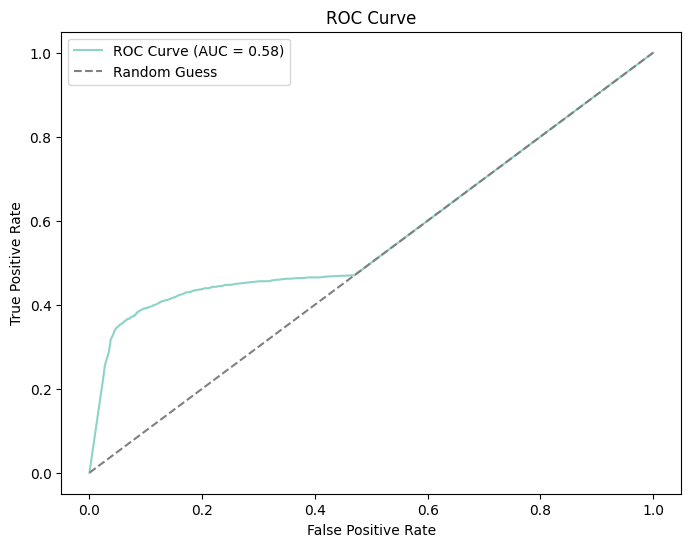

Accuracy: 0.9344578802967178
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     46573
           1       0.35      0.25      0.29      2632

    accuracy                           0.93     49205
   macro avg       0.65      0.61      0.63     49205
weighted avg       0.93      0.93      0.93     49205



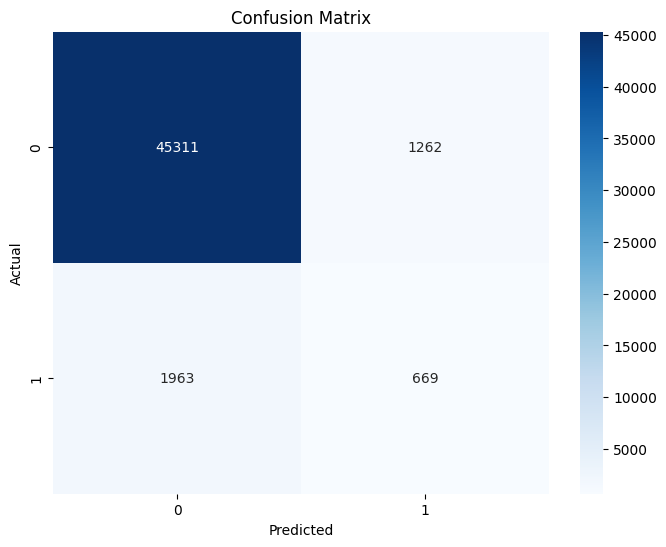

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# ROC-AUC 
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# AdaBoost

C:\Users\ardas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


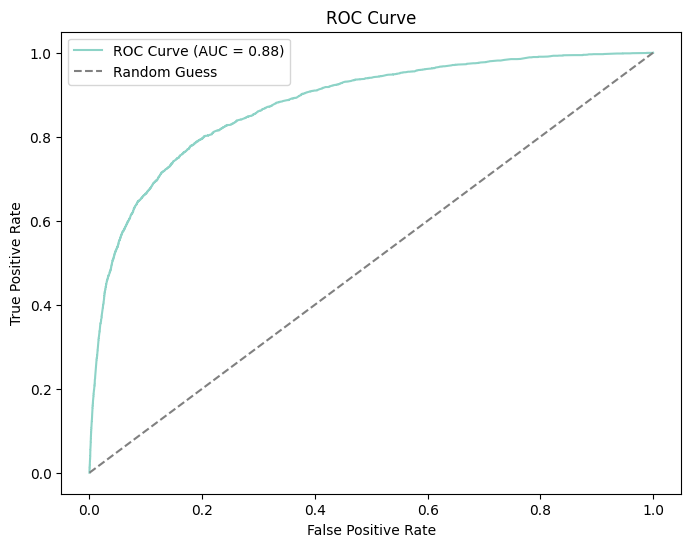

Accuracy: 0.9492328015445585
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46573
           1       0.55      0.26      0.36      2632

    accuracy                           0.95     49205
   macro avg       0.76      0.63      0.67     49205
weighted avg       0.94      0.95      0.94     49205



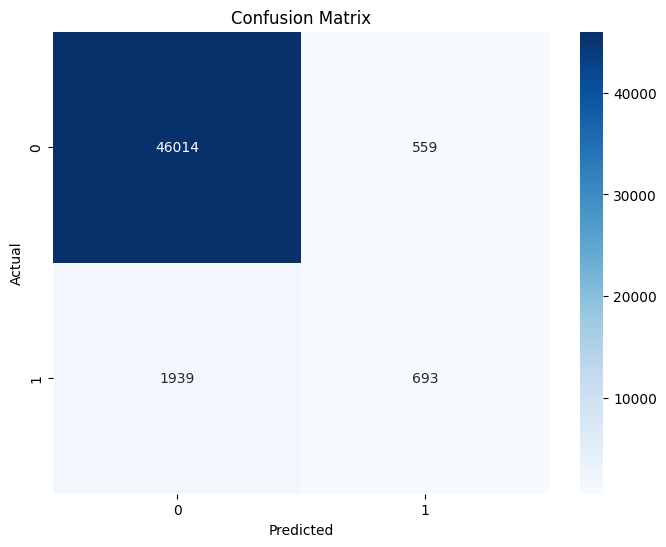

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adaboost 
model = AdaBoostClassifier(n_estimators=50, random_state=42)  # n_estimators: number of weak learners
model.fit(X_train, y_train)

# ROC-AUC 
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))


# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Stacking

In [46]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the data into features and target
X = data.drop('HadHeartAttack', axis=1)
y = data['HadHeartAttack']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the base classifiers
base_classifiers = [
    ('adaboost', AdaBoostClassifier(algorithm='SAMME')),
    ('decision_tree', DecisionTreeClassifier()),
    ('gradient_boosting', GradientBoostingClassifier()),
    ('logistic_regression', BaggingClassifier(estimator=LogisticRegression(), n_estimators=10, random_state=42)),
    ('random_forest', RandomForestClassifier())
]

# Define the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=LogisticRegression()
)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the performance
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46573
           1       0.55      0.25      0.35      2632

    accuracy                           0.95     49205
   macro avg       0.76      0.62      0.66     49205
weighted avg       0.94      0.95      0.94     49205



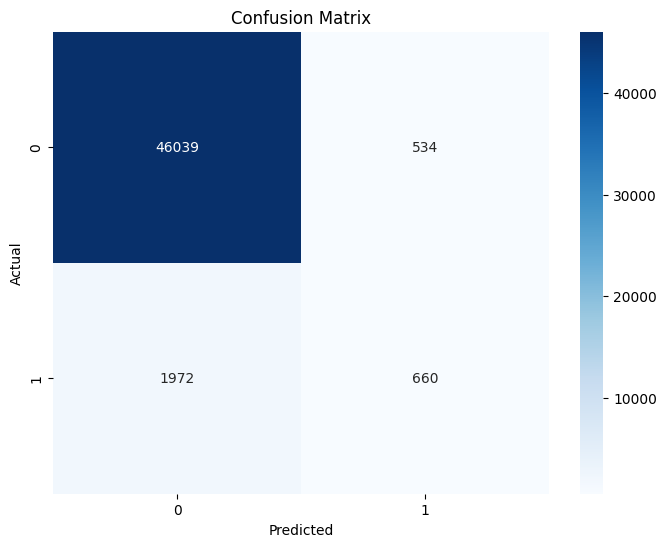

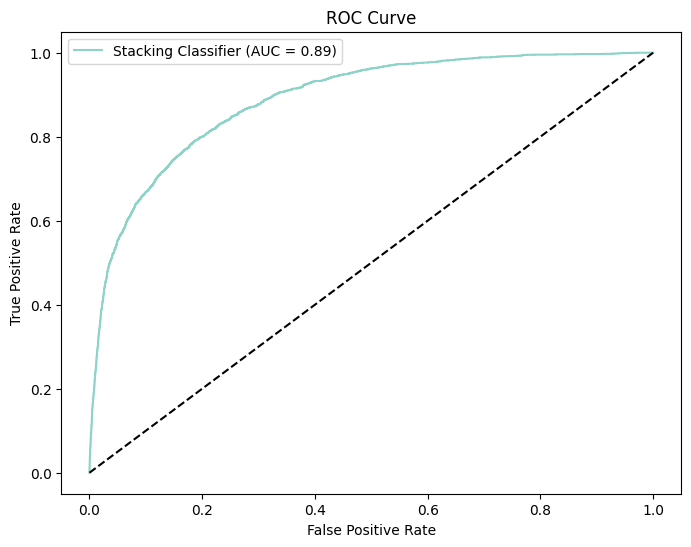

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Stacking Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()